In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from os import path as osp
import os
import Regression as reg
from sklearn.linear_model import LinearRegression

In [7]:
path2csv = "D:\Work\Sampling_attetion\Azadeh_data\\data\\"
RegBetascsv = "D:\\Work\\Sampling_attetion\\Azadeh_data\\result\\result_prev.csv"
inst = ['nat','health','desire']
DV = "Choice" 

In [4]:
shortInst = inst
dirList = os.listdir(path2csv)
RegBetas ={'Subject':[],shortInst[0]+'-Taste':[],shortInst[0]+'-Health':[], shortInst[0]+'-Prev_choice':[],\
         shortInst[1]+'-Taste':[],shortInst[1]+'-Health':[], shortInst[1]+'-Prev_choice':[],\
         shortInst[2]+'-Taste':[],shortInst[2]+'-Health':[], shortInst[2]+'-Prev_choice':[]}


for s in range(len(dirList)):

    print (path2csv + dirList[s])
    data = pd.read_excel(path2csv + dirList[s]) 
    RegBetas['Subject'].append(int(dirList[s][:len(dirList[0])-4]))
    data = data.dropna()
    for ins in shortInst:
        X       = np.zeros((len(data.trial[data.instruction == inst[shortInst.index(ins)]]) - 1,3))
        data
        X[:,0]  = data.taste[data.instruction == inst[shortInst.index(ins)]][1:]
        X[:,1]  = data.health[data.instruction == inst[shortInst.index(ins)]][1:]
        X[:,2]  = data.choice[data.instruction == inst[shortInst.index(ins)]][0:-1]

        if DV == 'Choice':
            Y       = data.choice[data.instruction == inst[shortInst.index(ins)]][1:]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y))[t] for t in range(len(Y))]

            if any(whichTr):
                Y = Y[whichTr]
                X = X[whichTr,:]

                reg      = LinearRegression().fit(X,Y)
                RegBetas[ins+'-Taste'].append(reg.coef_[0])
                RegBetas[ins+'-Health'].append(reg.coef_[1])
                RegBetas[ins+'-Prev_choice'].append(reg.coef_[2])

        elif DV == 'Liking':
            Y1       = data.preLiking[data.instruction == inst[shortInst.index(ins)]]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y1))[t] for t in range(len(Y1))]

            if any(whichTr):
                Y1 = Y1[whichTr]
                X1  = X[whichTr,:]
                reg      = LinearRegression().fit(X1,Y1)
                RegBetas[ins+'-Taste-pre'].append(reg.coef_[0])
                RegBetas[ins+'-Health-pre'].append(reg.coef_[1])
                RegBetas[ins+'-Prev_choice'].append(reg.coef_[2])

            Y2       = data.Liking[data.instruction == inst[shortInst.index(ins)]]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y2))[t] for t in range(len(Y2))]

            if any(whichTr):
                Y2 = Y2[whichTr]
                X2  = X[whichTr,:]
                reg      = LinearRegression().fit(X2,Y2)
                RegBetas[ins+'-Taste-post'].append(reg.coef_[0])
                RegBetas[ins+'-Health-post'].append(reg.coef_[1])
                RegBetas[ins+'-Prev_choice'].append(reg.coef_[2])

        elif DV == 'RT':
            Y       = data.RT[data.instruction == inst[shortInst.index(ins)]]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y))[t] for t in range(len(Y))]

            if any(whichTr):
                Y = Y[whichTr]
                X = X[whichTr,:]

                reg      = LinearRegression().fit(X,Y)
                RegBetas[ins+'-Taste'].append(reg.coef_[0])
                RegBetas[ins+'-Health'].append(reg.coef_[1])
                RegBetas[ins+'-prev_choice'].append(reg.coef_[2])

D:\Work\Sampling_attetion\Azadeh_data\data\104.xls
D:\Work\Sampling_attetion\Azadeh_data\data\105.xls
D:\Work\Sampling_attetion\Azadeh_data\data\106.xls
D:\Work\Sampling_attetion\Azadeh_data\data\107.xls
D:\Work\Sampling_attetion\Azadeh_data\data\111.xls
D:\Work\Sampling_attetion\Azadeh_data\data\112.xls
D:\Work\Sampling_attetion\Azadeh_data\data\113.xls
D:\Work\Sampling_attetion\Azadeh_data\data\114.xls
D:\Work\Sampling_attetion\Azadeh_data\data\115.xls
D:\Work\Sampling_attetion\Azadeh_data\data\116.xls
D:\Work\Sampling_attetion\Azadeh_data\data\117.xls
D:\Work\Sampling_attetion\Azadeh_data\data\118.xls
D:\Work\Sampling_attetion\Azadeh_data\data\119.xls
D:\Work\Sampling_attetion\Azadeh_data\data\120.xls
D:\Work\Sampling_attetion\Azadeh_data\data\121.xls
D:\Work\Sampling_attetion\Azadeh_data\data\122.xls
D:\Work\Sampling_attetion\Azadeh_data\data\123.xls
D:\Work\Sampling_attetion\Azadeh_data\data\124.xls
D:\Work\Sampling_attetion\Azadeh_data\data\125.xls
D:\Work\Sampling_attetion\Azade

In [8]:
print(RegBetas)
temp = pd.DataFrame.from_dict(RegBetas)
temp.to_csv(RegBetascsv)

{'Subject': [104, 105, 106, 107, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 148, 150, 151, 153, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166], 'nat-Taste': [0.5334800573253456, 0.6905448271189424, 0.36475047650379533, 0.41943044847395605, 0.7032770163131823, 0.7117682449985027, 0.5345730049978841, 0.6151456019963321, 0.38192181643137907, 0.7392831648681334, 0.4164357763083768, 0.6602778015466774, 0.01585159555036281, 0.4041746635986983, 0.44322623484932555, 0.6250780274791637, 0.6931405231759902, 0.45578396006824645, 0.6809345684471523, 0.2971768349844081, 0.5641536994377963, 0.3451528734333812, 0.8139500117938939, 0.4052667418315899, 0.22983299316223355, 0.42753599387080793, 0.45385362800485257, 0.09296128065736023, 0.22390488350274193, 0.8590931032900297, 0.5600057895524663, 0.5974442897577401, 0.6907718924912835, 0.12451677377987787, 0.39854838031166406, 0.3371393

In [51]:
study='Is there any effect of previous choice?'
# plot taste and health weights on choice=
choiceBetas = pd.read_csv('D:\\Work\\Sampling_attetion\\Azadeh_data\\result\\result_prev.csv')
#get rid of the Unnamed column
choiceBetas = choiceBetas.drop(choiceBetas.columns[0],axis=1)
#get rid of - in column labels to be possible to call
cols = list(choiceBetas.columns)
for c in range(len(cols)):
    cols[c] = cols[c].replace('-','')
choiceBetas.columns = cols

#[cols[c] = cols[c].replace('-','') for c in range(len(cols))]
condsOld = ['nat','health','desire']
condsNew = ['NATURAL','HEALTH','DESIRE']
attsOld  = ['Taste','Health', 'Prev_choice']
attsNew  = ['Tastiness','Healthiness', 'Previous Choice']
colors   = ['royalblue','salmon','gold']


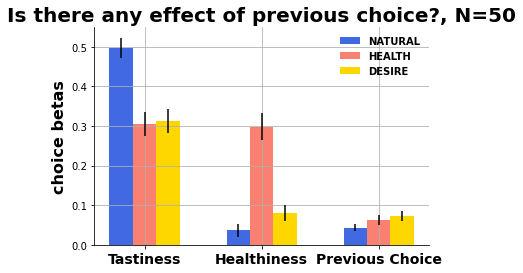

In [52]:
fig, ax = plt.subplots()
width = .4
x = np.asarray([0,2, 4])
dist = [-1,0,1]
for c in range(len(condsNew)):
    y = list()
    ysd = list()
    [y.append(np.mean(choiceBetas[condsOld[c]+attsOld[a]])) for a in range(len(attsOld))]
    [ysd.append(np.std(choiceBetas[condsOld[c]+attsOld[a]])/np.sqrt(choiceBetas.shape[0])) for a in range(len(attsOld))]
    ax.bar(x+np.asarray(dist[c])*width,y,width,label =condsNew[c],color=colors[c])
    ax.errorbar(x+np.asarray(dist[c])*width,y,yerr=ysd,ecolor='k',fmt='none')

ax.set_ylabel('choice betas',fontdict={'fontsize':16,'fontweight': 'bold'})
ax.set_title(study+ ', N='+str(choiceBetas.shape[0]),fontdict={'fontsize':20,'fontweight': 'bold'})
ax.set_xticks(x)
ax.set_xticklabels(attsNew,fontdict={'fontsize':14,'fontweight': 'bold'})
#remove top frame border
ax.spines['top'].set_visible(False)
#remove right frame border
ax.spines['right'].set_visible(False)
plt.legend(fontsize = 12, prop = {'weight':'bold'},frameon=False)
ax.grid(b=None)
plt.show()